In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


# Figure 12

In [2]:
ddp_list =  [24, 36, 48]
n_list = [500, 400, 300]
df = pd.DataFrame(columns=['rmse', 'nll','crps', "cov", "unc", "loss", "n", "method", "fold", "lp"])

for n in n_list:
    for Lp in ddp_list:
        df = pd.concat([df, pd.read_csv("reviewer_results/review_lp_{}_{}_25.csv".format(Lp, n))], ignore_index=True)

j3_df = df[df['method'] == "J=3"][['fold', 'loss', 'n', 'lp']].rename(columns = {"loss": 'j3_loss', "method": "numJ"})
df = df.merge(j3_df, on=['fold', 'n', "lp"], how='left').rename(columns = {"method": "L"})
df = df.replace({"J=3": "L=3", "J=4" : "L=4"})

/tmp/ipykernel_205860/3403525554.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.read_csv("reviewer_results/review_lp_{}_{}_25.csv".format(Lp, n))], ignore_index=True)
/tmp/ipykernel_205860/3403525554.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"J=3": "L=3", "J=4" : "L=4"})


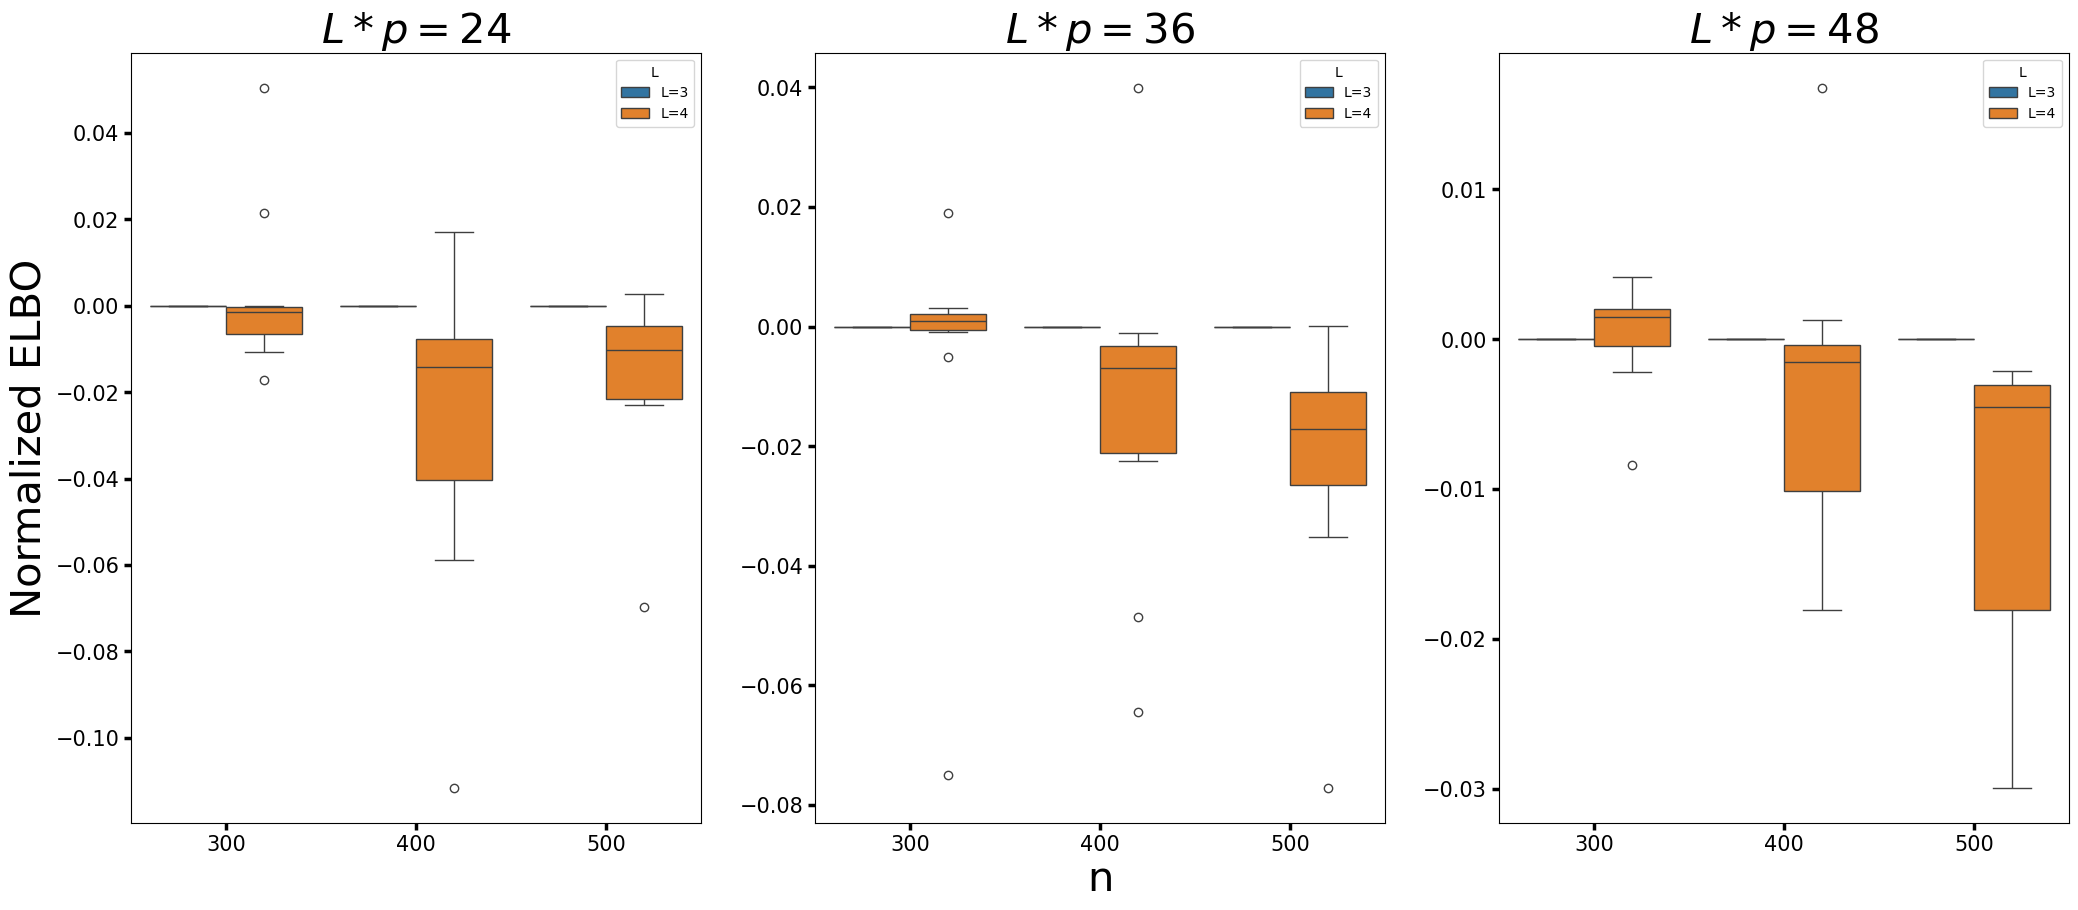

In [4]:
fig, axs = plt.subplots(1, 3, figsize = (25, 10))

for i, l in enumerate(ddp_list):
    rel_df = df[df['lp'] == l].copy()
    rel_df['norm_loss'] = (rel_df['j3_loss']- rel_df['loss'])/rel_df['n']
    
    sns.boxplot(data = rel_df, x = "n", y = "norm_loss", hue = "L",dodge = True, ax = axs[i])
    axs[i].set_title("$L*p = {}$".format(l), fontsize = 30)
    #axs[i].set_ylim((-.1, .02))
    axs[i].set_ylabel(None)
    axs[i].set_xlabel(None)
    axs[i].tick_params(axis='both', which='both', labelsize=15, length = 5, width = 2.5)

axs[0].set_ylabel("Normalized ELBO", fontsize = 30)
axs[1].set_xlabel("n", fontsize = 30)
plt.savefig("reviewer_plots/review_lp.png", dpi = 150, bbox_inches = "tight")


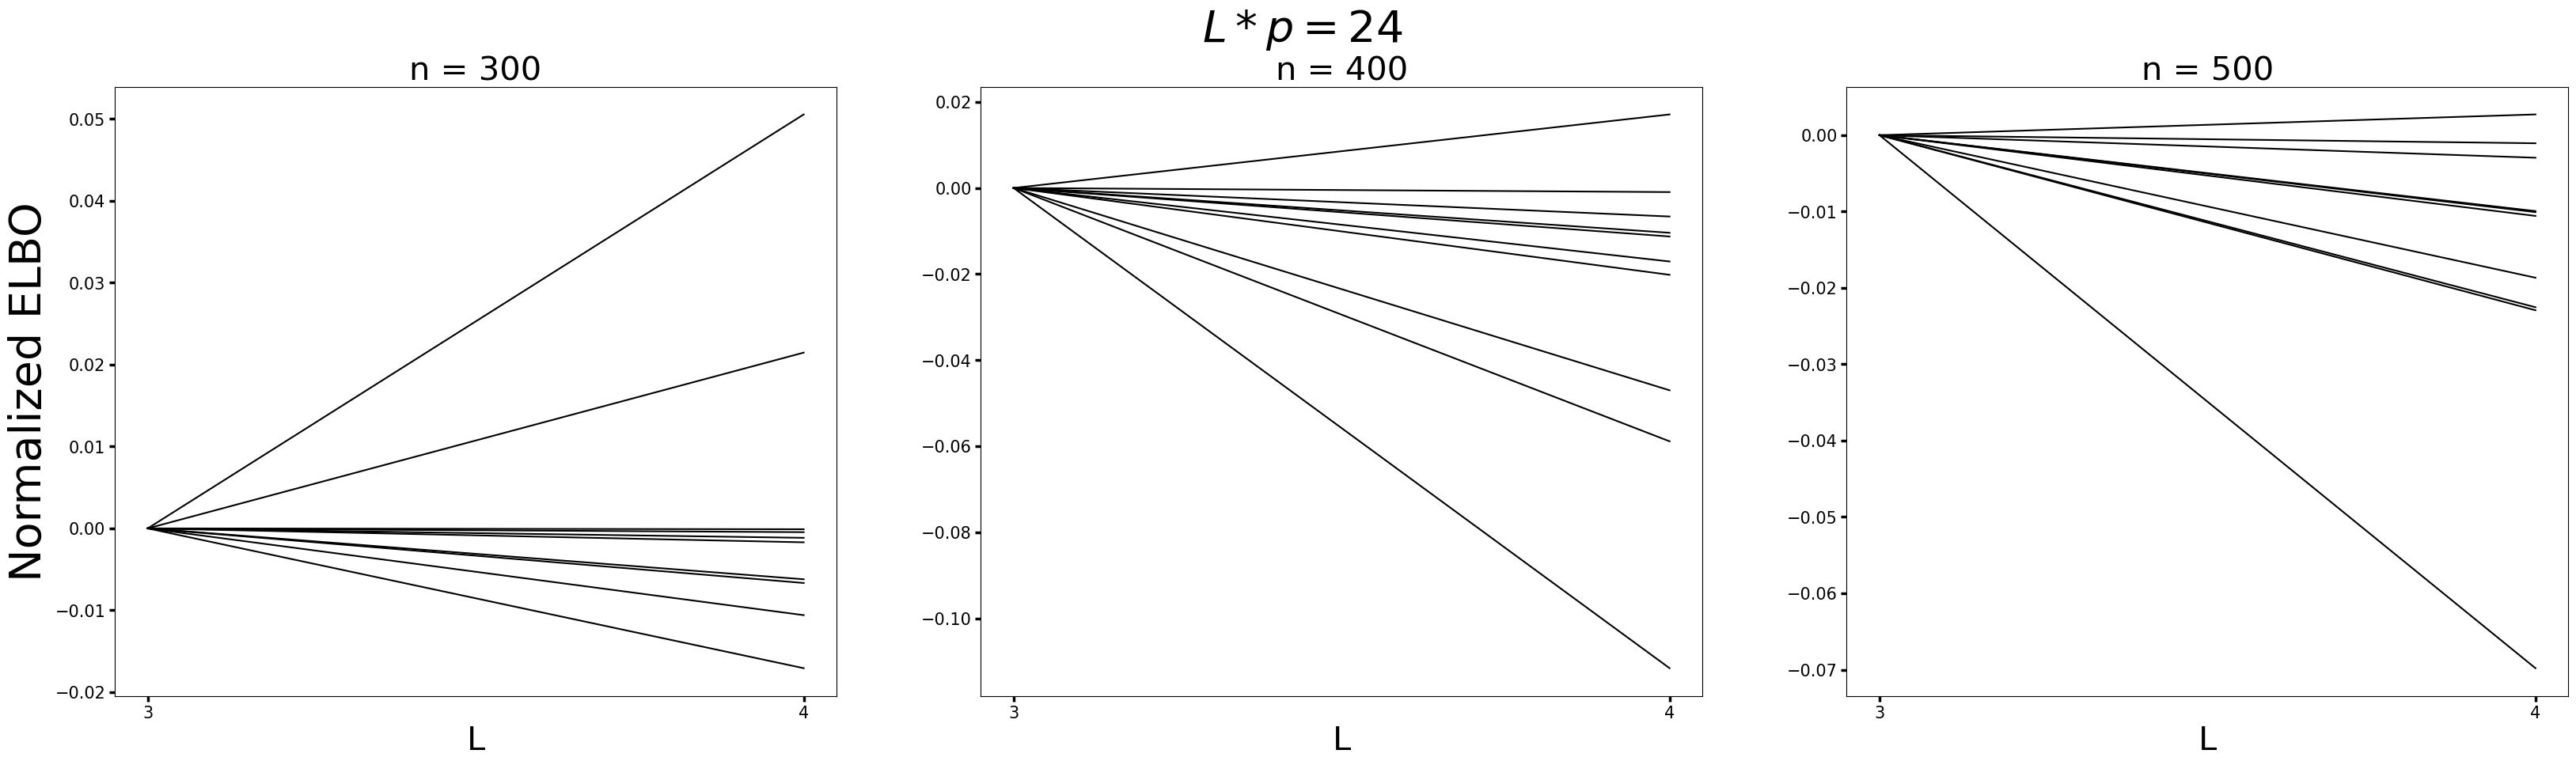

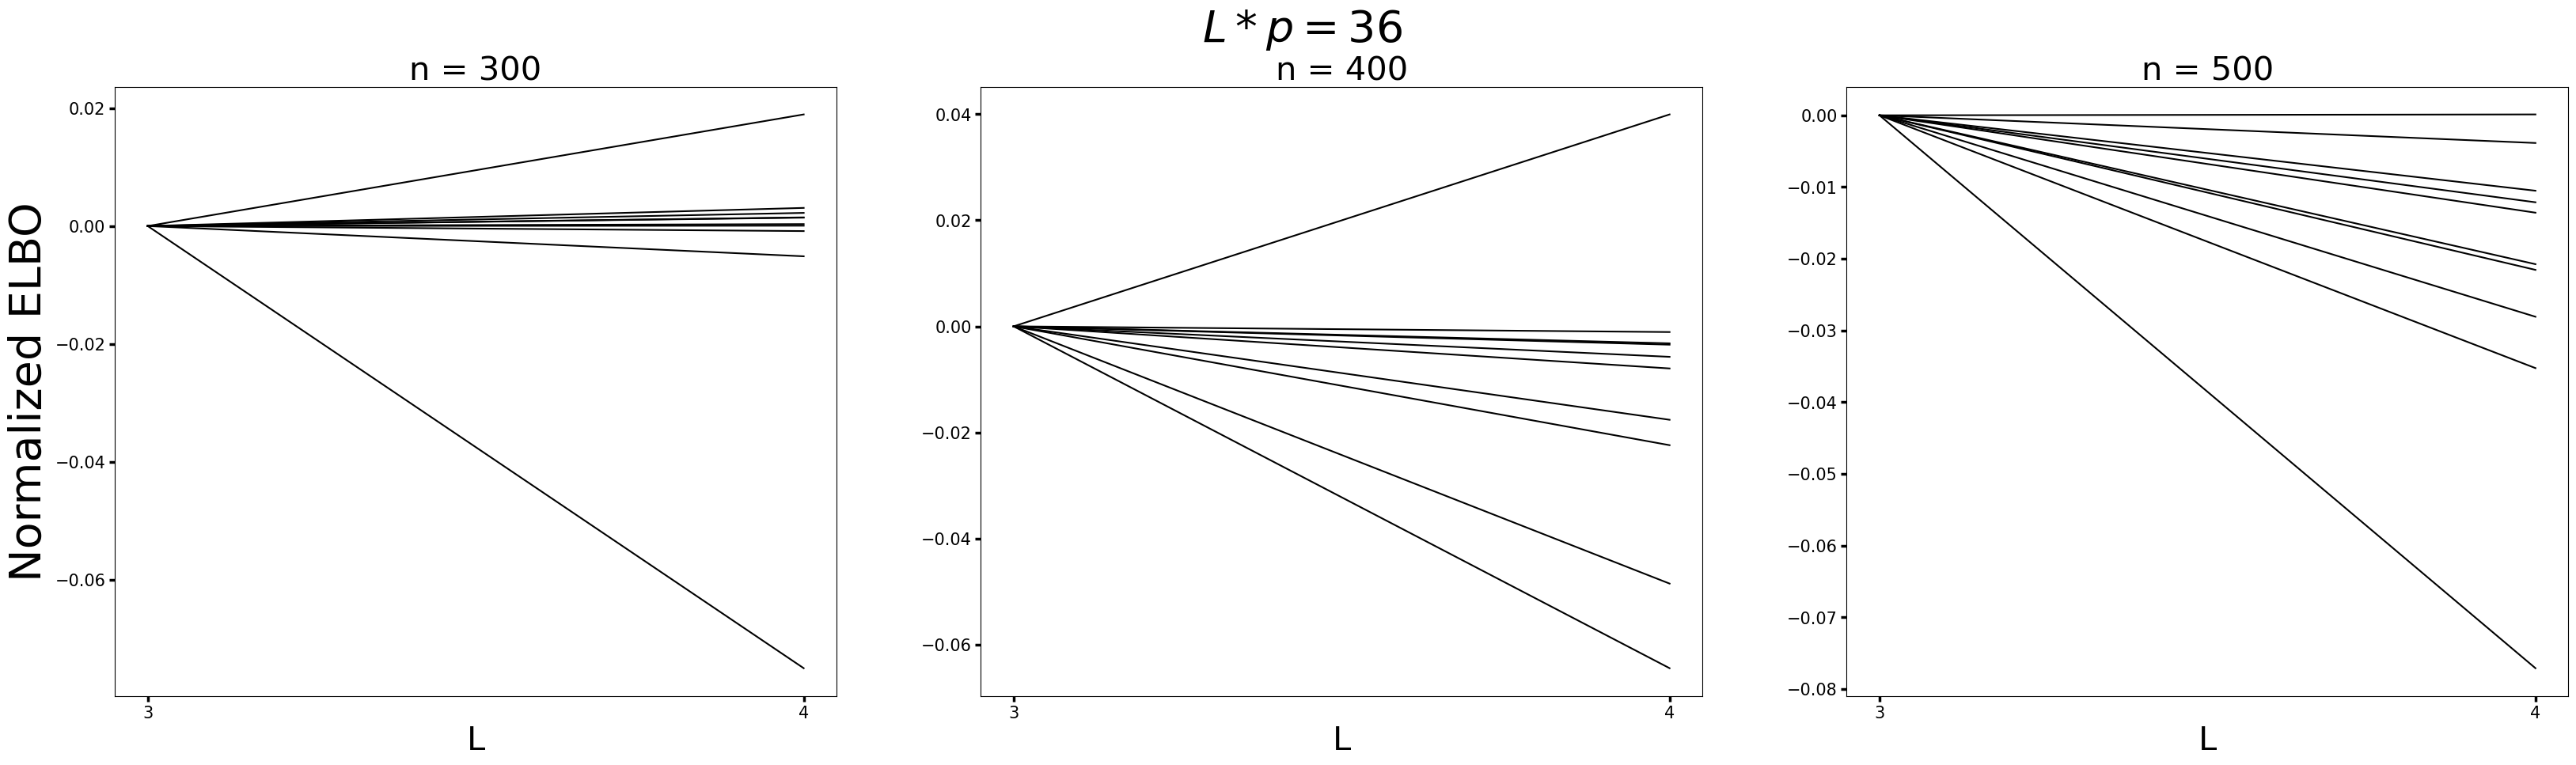

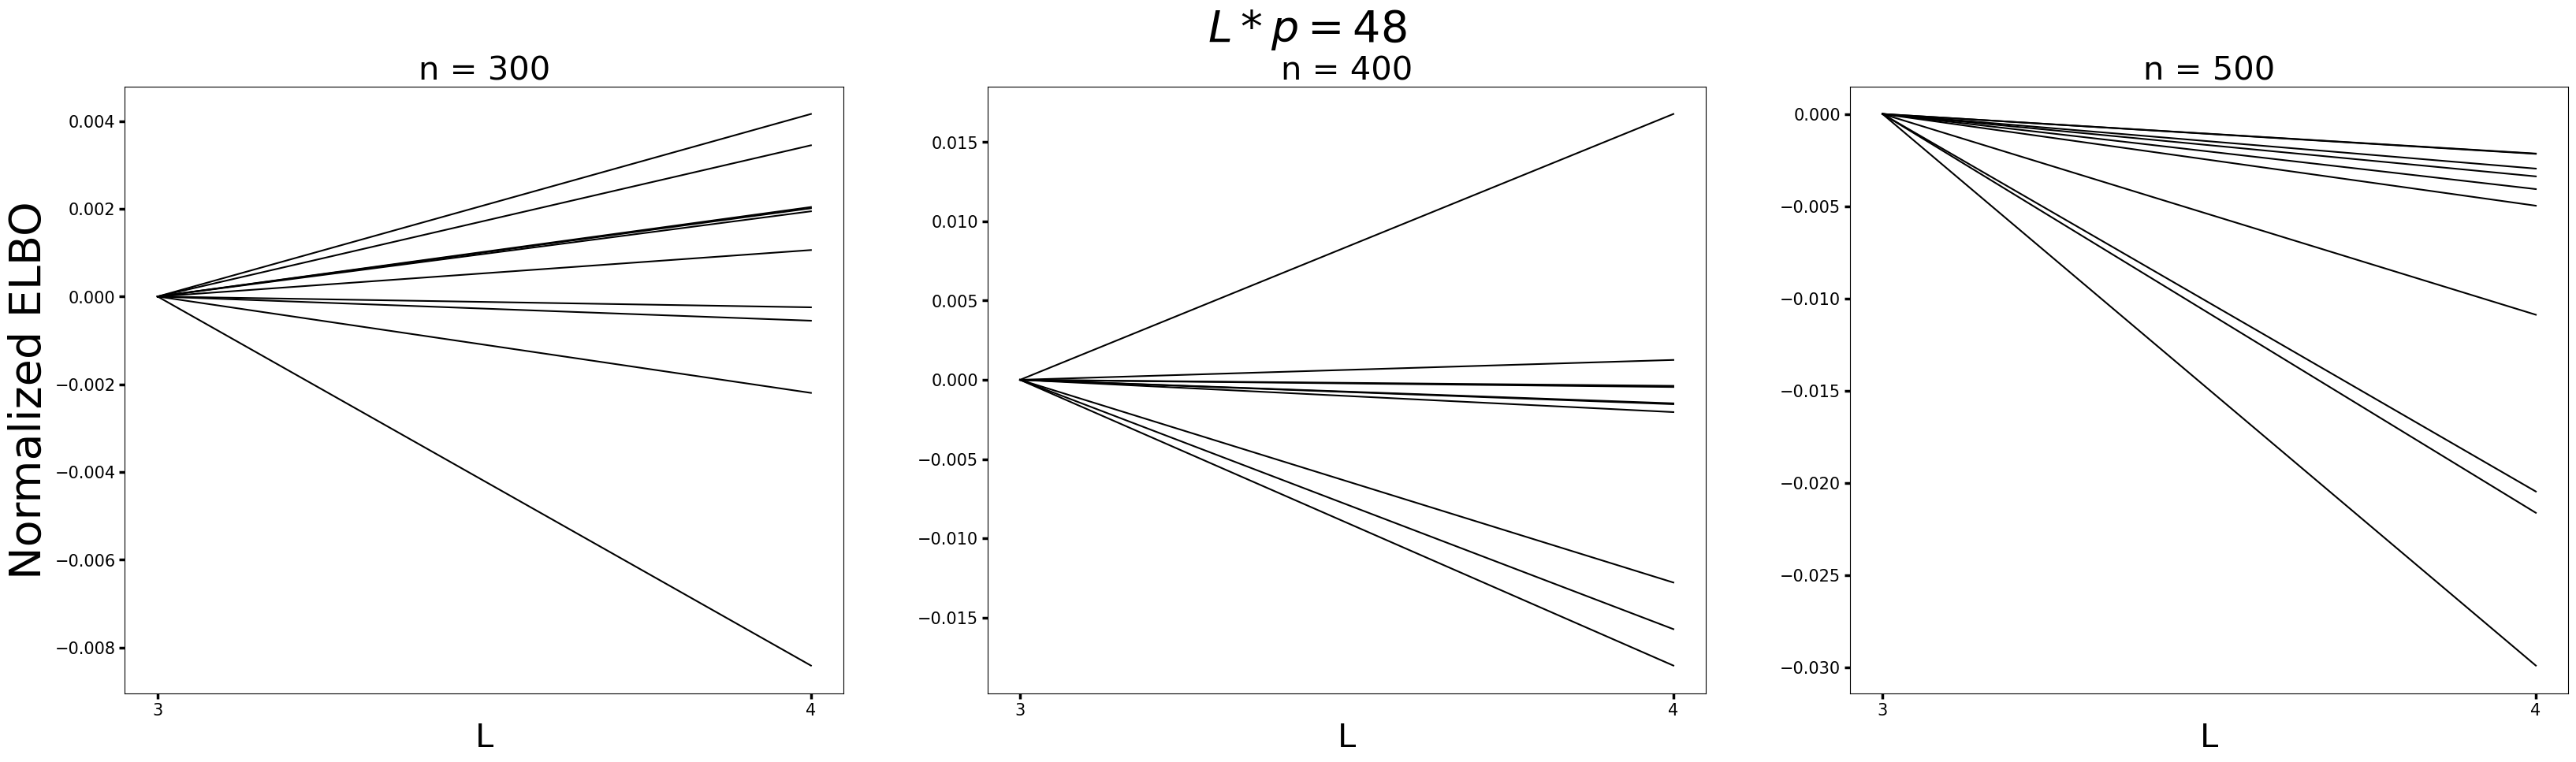

In [5]:
def extract_L(stri):
    for h in (2, 3, 4):
        if stri.find(str(h)) >= 0:
            return h

L = pd.Series([extract_L(el) for el in df["L"]])
mix_frame2 = pd.concat([df, pd.DataFrame({"Ln": L})], axis = 1)
plot_frame = mix_frame2[["loss", "j3_loss", "n", "Ln", "fold", "lp"]]


lp = [24, 36, 48]
for k, obs in enumerate(lp):
    fig, axs = plt.subplots(1, 3, figsize = (40, 10))
    
    i_frame = plot_frame[plot_frame["lp"] == obs]
    for i, n in enumerate((300, 400, 500)):
        for j in range(0, 10):
            s_frame = i_frame[np.logical_and(i_frame["n"] == n, i_frame["fold"] == j)].to_numpy()
            norm_loss = (s_frame[:, 1]- s_frame[:, 0])/n
            axs[i].plot(s_frame[:, 3], norm_loss, color = "black")
        axs[i].set_title("n = {}".format(n), fontsize = 30)
        if i == 0:
            axs[i].set_ylabel("Normalized ELBO", fontsize = 40)
        axs[i].set_xlabel("L", fontsize = 30)
        axs[i].set_xticks([3, 4])
        axs[i].tick_params(axis='both', which='both', labelsize=15, length = 5, width = 2.5)
        #axs[i].set_ylim((-.1, .02))

    fig.suptitle("$L*p = {}$".format(obs), fontsize = 40)
    plt.savefig("reviewer_plots/sim_elbo_path_{}.png".format(k))

# Author Response: Extra

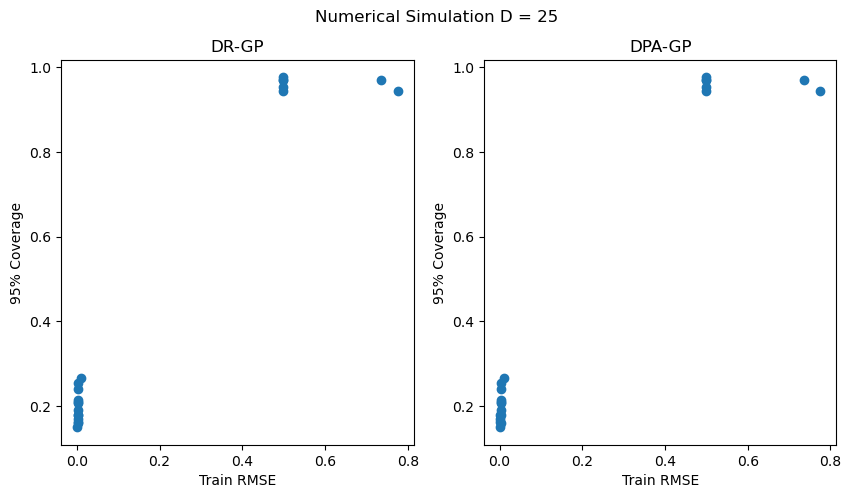

In [6]:
df = pd.read_csv("reviewer_results/numerical_instability.csv")

fig, axs = plt.subplots(1, 2, figsize = (10, 5))

method = ["DR-GP", "DPA-GP"]


for i, m in enumerate(method):
    rel_df = df[df['method'] == m]
    axs[i].scatter(df['train_rmse'], df['cov'])
    axs[i].set_xlabel("Train RMSE")
    axs[i].set_ylabel("95% Coverage")
    axs[i].set_title(m)
fig.suptitle("Numerical Simulation D = 25")
plt.savefig("review_stability.png", dpi = 150, bbox_inches = "tight")